In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

!pip install nilearn
from nilearn.connectome import ConnectivityMeasure

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 56.0 MB/s eta 0:00:00


# The mapping of two different atlases

In [3]:
data = np.load('ihb.npy')
import numpy as np
from scipy.spatial import distance_matrix

# координаты каждого индекса в мозге
schaefer_coordinates_200 = np.array([[-24, -54, -10], [-26, -78, -14], [-46, -70, -8], [-10, -68, -4], [-26, -96, -12],
    [-14, -44, -2], [-6, -92, -4], [-48, -70, 10], [-22, -96, 6], [-12, -70, 8],
    [-40, -84, 10], [-12, -72, 22], [-6, -88, 28], [-24, -88, 24], [-50, -4, -2],
    [-54, -24, 10], [-36, -22, 16], [-56, -4, 10], [-52, -22, 18], [-56, -8, 30],
    [-48, -8, 46], [-8, -12, 46], [-48, -28, 56], [-40, -26, 56], [-30, -46, 62],
    [-32, -22, 64], [-26, -38, 68], [-20, -10, 68], [-4, -32, 66], [-20, -30, 68],
    [-44, -48, -20], [-56, -60, -2], [-26, -70, 38], [-54, -26, 42], [-40, -36, 48],
    [-32, -48, 46], [-16, -72, 54], [-30, -60, 60], [-6, -60, 56], [-18, -54, 68],
    [-32, -4, 54], [-22, 6, 62], [-48, 6, 28], [-56, -40, 20], [-62, -26, 28],
    [-60, -40, 36], [-40, -4, -4], [-34, 20, 6], [-38, 0, 10], [-52, 8, 10],
    [-28, 42, 32], [-6, 10, 42], [-12, -36, 46], [-6, -2, 66], [-24, 22, -20],
    [-10, 36, -20], [-30, -6, -40], [-44, -20, -30], [-28, 10, -34], [-42, 8, -18],
    [-54, -50, 46], [-34, -62, 48], [-46, -42, 46], [-60, -42, -14], [-32, 42, -14],
    [-42, 50, -6], [-28, 58, 8], [-42, 40, 16], [-44, 20, 28], [-42, 6, 44],
    [-10, -74, 38], [-4, -28, 28], [-4, 4, 30], [-46, 8, -32], [-60, -18, -22],
    [-56, -6, -12], [-58, -30, -4], [-58, -42, 8], [-48, -58, 18], [-38, -80, 32],
    [-58, -54, 28], [-46, -66, 38], [-34, 20, -14], [-6, 36, -10], [-46, 30, -8],
    [-12, 64, -6], [-52, 22, 8], [-6, 44, 8], [-8, 60, 20], [-6, 30, 24],
    [-12, 48, 44], [-4, 34, 44], [-40, 18, 50], [-24, 24, 48], [-10, 16, 64],
    [-10, -56, 12], [-6, -54, 28], [-4, -30, 36], [-6, -54, 42], [-26, -32, -18],
    [38, -34, -24], [28, -36, -14], [28, -68, -12], [12, -64, -4], [48, -72, -6],
    [12, -92, -6], [16, -46, -2], [30, -94, -4], [8, -76, 8], [22, -60, 8],
    [42, -80, 10], [20, -90, 22], [10, -74, 26], [16, -84, 40], [32, -74, 32],
    [52, -14, 4], [64, -24, 8], [38, -14, 14], [44, -28, 18], [60, 0, 10],
    [56, -12, 14], [58, -4, 30], [10, -16, 42], [52, -22, 52], [46, -12, 48],
    [6, -10, 52], [40, -24, 58], [32, -40, 64], [34, -20, 66], [28, -34, 66],
    [22, -8, 68], [10, -40, 70], [6, -22, 68], [20, -30, 70], [50, -54, -16],
    [52, -60, 10], [60, -16, 34], [46, -38, 50], [42, -32, 46], [14, -74, 52],
    [34, -48, 50], [26, -62, 58], [8, -56, 62], [22, -48, 70], [34, -4, 52],
    [26, 8, 58], [52, 10, 20], [58, -46, 10], [60, -38, 16], [60, -26, 28],
    [50, 4, 40], [40, 6, -16], [46, -4, -4], [36, 24, 4], [44, 6, 4], [8, 10, 42],
    [10, -36, 46], [8, 4, 66], [12, 38, -22], [28, 22, -20], [14, 64, -8],
    [30, 8, -38], [46, -12, -34], [26, -10, -32], [62, -38, 36], [52, -42, 48],
    [38, -62, 48], [62, -42, -12], [34, 22, -8], [36, 46, -14], [30, 58, 4],
    [44, 44, 10], [46, 24, 26], [30, 48, 28], [40, 34, 38], [42, 14, 48],
    [14, -70, 36], [6, -24, 30], [4, 2, 30], [8, 30, 28], [8, 24, 56],
    [46, -70, 28], [54, -50, 28], [50, -58, 44], [48, 12, -30], [60, -12, -20],
    [54, -6, -10], [62, -26, -6], [52, -32, 2], [50, 28, 0], [4, 36, -14],
    [8, 42, 4], [6, 28, 16], [8, 58, 18], [16, 46, 44], [28, 30, 42],
    [24, 24, 54], [12, -54, 14], [6, -48, 30], [6, -58, 44]])

# уже в порядке Left -> Right
brainnetome_coordinates_246 = np.array([
    [-5, 15, 54], [-18, 24, 53], [-11, 49, 40], [-18, -1, 65], [-6, -5, 58],
    [-5, 36, 38], [-8, 56, 15], [-27, 43, 31], [-42, 13, 36], [-28, 56, 12],
    [-41, 41, 16], [-33, 23, 45], [-32, 4, 55], [-26, 60, -6], [-46, 13, 24],
    [-47, 32, 14], [-53, 23, 11], [-49, 36, -3], [-39, 23, 4], [-52, 13, 6],
    [-7, 54, -7], [-36, 33, -16], [-23, 38, -18], [-6, 52, -19], [-10, 18, -19],
    [-41, 32, -9], [-49, -8, 39], [-32, -9, 58], [-26, -25, 63], [-13, -20, 73],
    [-52, 0, 8], [-49, 5, 30], [-8, -38, 58], [-4, -23, 61], [-32, 14, -34],
    [-54, -32, 12], [-50, -11, 1], [-62, -33, 7], [-45, 11, -20], [-55, -3, -10],
    [-65, -30, -12], [-53, 2, -30], [-59, -58, 4], [-58, -20, -9], [-45, -26, -27],
    [-51, -57, -15], [-43, -2, -41], [-56, -16, -28], [-55, -60, -6], [-59, -42, -16],
    [-55, -31, -27], [-33, -16, -32], [-31, -64, -14], [-42, -51, -17], [-27, -7, -34],
    [-25, -25, -26], [-28, -32, -18], [-19, -12, -30], [-23, 2, -32], [-17, -39, -10],
    [-54, -40, 4], [-52, -50, 11], [-16, -60, 63], [-15, -71, 52], [-33, -47, 50],
    [-22, -47, 65], [-27, -59, 54], [-34, -80, 29], [-38, -61, 46], [-51, -33, 42],
    [-56, -49, 38], [-47, -65, 26], [-53, -31, 23], [-5, -63, 51], [-8, -47, 57],
    [-12, -67, 25], [-6, -55, 34], [-50, -16, 43], [-56, -14, 16], [-46, -30, 50],
    [-21, -35, 68], [-36, -20, 10], [-32, 14, -13], [-34, 18, 1], [-38, -4, -9],
    [-38, -8, 8], [-38, 5, 5], [-4, -39, 31], [-3, 8, 25], [-6, 34, 21],
    [-8, -47, 10], [-5, 7, 37], [-7, -23, 41], [-4, 39, -2], [-11, -82, -11],
    [-5, -81, 10], [-6, -94, 1], [-17, -60, -6], [-13, -68, 12], [-31, -89, 11],
    [-46, -74, 3], [-18, -99, 2], [-30, -88, -12], [-11, -88, 31], [-22, -77, 36],
    [-19, -2, -20], [-27, -4, -20], [-22, -14, -19], [-28, -30, -10], [-12, 14, 0],
    [-22, -2, 4], [-17, 3, -9], [-23, 7, -4], [-14, 2, 16], [-28, -5, 2],
    [-7, -12, 5], [-18, -13, 3], [-18, -23, 4], [-7, -14, 7], [-16, -24, 6],
    [-15, -28, 4], [-12, -22, 13], [-11, -14, 2], [7, 16, 54], [22, 26, 51], [13, 48, 40], [20, 4, 64], [7, -4, 60],
    [6, 38, 35], [8, 58, 13], [30, 37, 36], [42, 11, 39], [28, 55, 17],
    [42, 44, 14], [42, 27, 39], [34, 8, 54], [25, 61, -4], [45, 16, 25],
    [48, 35, 13], [54, 24, 12], [51, 36, -1], [42, 22, 3], [54, 14, 11],
    [6, 47, -7], [40, 39, -14], [23, 36, -18], [6, 57, -16], [9, 20, -19],
    [42, 31, -9], [55, -2, 33], [33, -7, 57], [34, -19, 59], [15, -22, 71],
    [54, 4, 9], [51, 7, 30], [10, -34, 54], [5, -21, 61], [31, 15, -34],
    [54, -24, 11], [51, -4, -1], [66, -20, 6], [47, 12, -20], [56, -12, -5],
    [65, -29, -13], [51, 6, -32], [60, -53, 3], [58, -16, -10], [46, -14, -33],
    [53, -52, -18], [40, 0, -43], [55, -11, -32], [54, -57, -8], [61, -40, -17],
    [54, -31, -26], [33, -15, -34], [31, -62, -14], [43, -49, -19], [28, -8, -33],
    [26, -23, -27], [30, -30, -18], [19, -10, -30], [22, 1, -36], [19, -36, -11],
    [53, -37, 3], [57, -40, 12], [19, -57, 65], [19, -69, 54], [35, -42, 54],
    [23, -43, 67], [31, -54, 53], [45, -71, 20], [39, -65, 44], [47, -35, 45],
    [57, -44, 38], [53, -54, 25], [55, -26, 26], [6, -65, 51], [7, -47, 58],
    [16, -64, 25], [6, -54, 35], [50, -14, 44], [56, -10, 15], [48, -24, 48],
    [20, -33, 69], [37, -18, 8], [33, 14, -13], [36, 18, 1], [39, -2, -9],
    [39, -7, 8], [38, 5, 5], [4, -37, 32], [5, 22, 12], [5, 28, 27],
    [9, -44, 11], [4, 6, 38], [6, -20, 40], [5, 41, 6], [10, -85, -9],
    [7, -76, 11], [8, -90, 12], [18, -60, -7], [15, -63, 12], [34, -86, 11],
    [48, -70, -1], [22, -97, 4], [32, -85, -12], [16, -85, 34], [29, -75, 36],
    [19, -2, -19], [28, -3, -20], [22, -12, -20], [29, -27, -10], [15, 14, -2],
    [22, -2, 3], [15, 8, -9], [22, 8, -1], [14, 5, 14], [29, -3, 1],
    [7, -11, 6], [12, -14, 1], [18, -22, 3], [3, -13, 5], [15, -25, 6],
    [13, -27, 8], [10, -14, 14], [13, -16, 7]])

# Матрица расстояний между точками
dist_matrix = distance_matrix(schaefer_coordinates_200, brainnetome_coordinates_246)

nearest_points_for_200 = np.argmin(dist_matrix, axis=1) # каждой точке из 200 определяем ближайшую точку для из 246

The indexes from Schaefer 200 and 200 nearest points from Brainnetome in 3D

In [4]:
import plotly.graph_objects as go
brainnetome_coordinates_200 = brainnetome_coordinates_246[nearest_points_for_200]
# Unpack the coordinates for plotting
x1, y1, z1 = schaefer_coordinates_200[:, 0], schaefer_coordinates_200[:, 1], schaefer_coordinates_200[:, 2]
x2, y2, z2 = brainnetome_coordinates_200[:, 0], brainnetome_coordinates_200[:, 1], brainnetome_coordinates_200[:, 2]

# Create the 3D scatter plot
fig = go.Figure()

# First set of points (blue)
fig.add_trace(go.Scatter3d(
    x=x1, y=y1, z=z1,
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='First Set'
))

# Second set of points (red)
fig.add_trace(go.Scatter3d(
    x=x2, y=y2, z=z2,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.8
    ),
    name='Second Set'
))

# Update the layout of the plot
fig.update_layout(
    title="3D Scatter Plot of Two Sets of Coordinates",
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    ),
    width=800,
    margin=dict(r=20, l=10, b=10, t=10)
)

# Show the plot
fig.show()

In [5]:
indices_200 = np.where(np.isnan(data).any(axis=2).any(axis=1))
indices_246 = np.where(~np.isnan(data).any(axis=2).any(axis=1))
data_200 = data[indices_200][:, :, :200]
data_246 = data[indices_246][:, :, np.array([i for i in range(0, 246, 2)] + [i for i in range(1, 246, 2)])]
data_from246_to200 = data_246[:, :, nearest_points_for_200]

In [6]:
conn_schaefer = ConnectivityMeasure(kind='correlation', standardize=False).fit_transform(data_200)
conn_schaefer[conn_schaefer == 1] = 0.999999
for i in conn_schaefer:
  np.fill_diagonal(i, 0)

conn_schaefer = np.arctanh(conn_schaefer)

conn_brainnetome = ConnectivityMeasure(kind='correlation', standardize=False).fit_transform(data_from246_to200)
conn_brainnetome[conn_brainnetome == 1] = 0.999999
for i in conn_brainnetome:
  np.fill_diagonal(i, 0)

conn_brainnetome = np.arctanh(conn_brainnetome)

conn = ConnectivityMeasure(kind='correlation', standardize=False).fit_transform(data[indices_246])
conn[conn == 1] = 0.999999
for i in conn:
  np.fill_diagonal(i, 0)

conn = np.arctanh(conn)

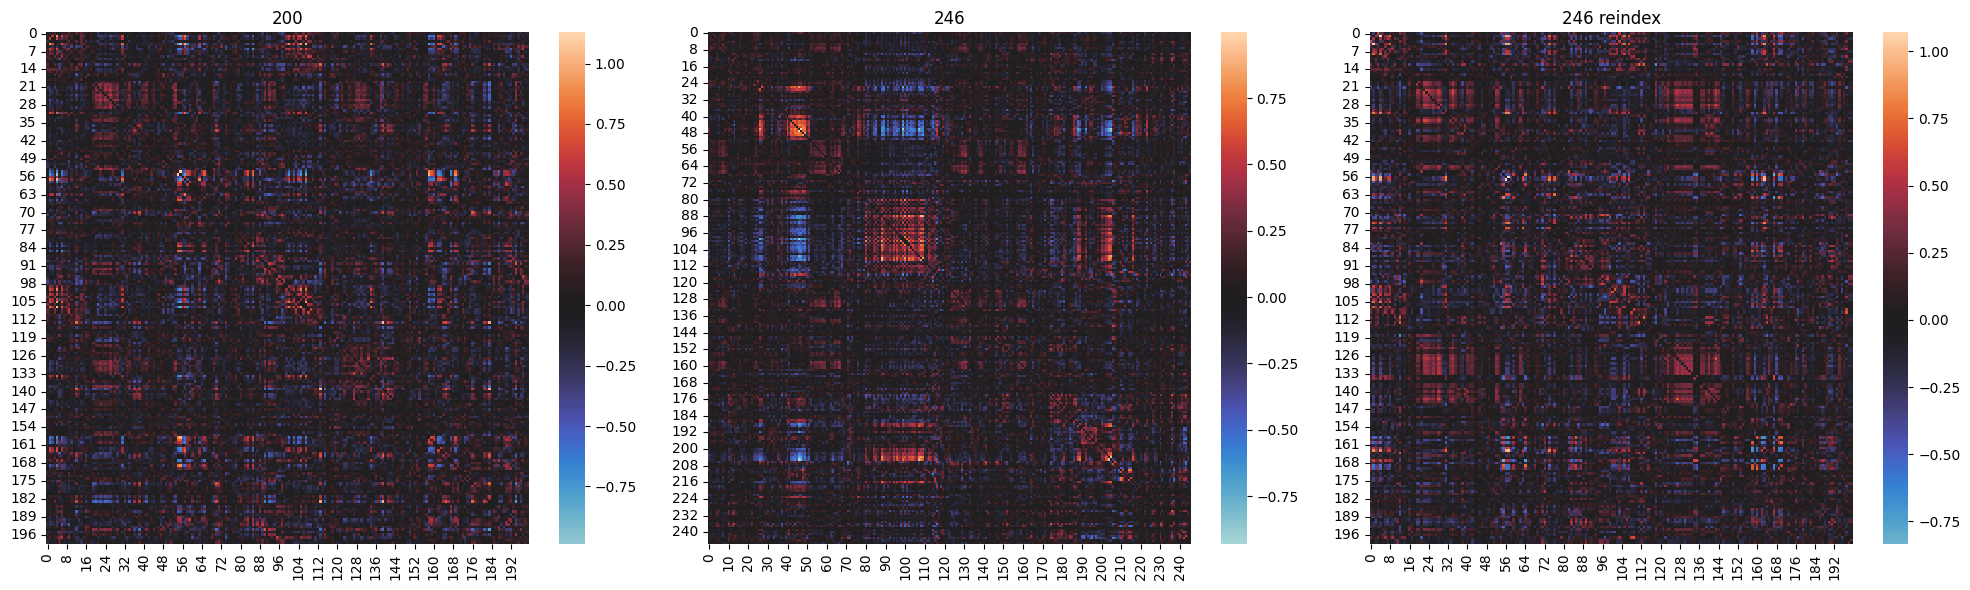

In [7]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first heatmap
sns.heatmap(conn_schaefer[41], center=0, ax=axes[0])
axes[0].set_title('200')

# Plot the second heatmap
sns.heatmap(conn[60], center=0, ax=axes[1])
axes[1].set_title('246')

# Plot the second heatmap
sns.heatmap(conn_brainnetome[60], center=0, ax=axes[2])
axes[2].set_title('246 reindex')

# Show the figure
plt.tight_layout()
plt.show()

Here we see that 246 reidex approximates the Schaefer 200

In [ ]:
rs = 3245353


data_common = np.zeros((320, 10, 200))
data_common[indices_200] = data_200
data_common[indices_246] = data_from246_to200


conn_common = ConnectivityMeasure(kind='correlation', standardize=False).fit_transform(data_common)
conn_common[conn_common == 1] = 0.999999
for i in conn_common:
  np.fill_diagonal(i, 0)

conn_common = np.arctanh(conn_common)

corrs_common = np.zeros((320, 19900))

for i in range(len(conn_common)):
  corrs_common[i] = conn_common[i][np.triu_indices(conn_common[i].shape[0], k=1)]
'''
# pca to maximal dimension
from sklearn.decomposition import PCA
pca = PCA(n_components=160, random_state = rs)
embeddings_200 = pca.fit_transform(corrs_200)
'''
embeddings_common = corrs_common # не забыть удалить


# fitting the model, get the labelling
model = make_pipeline(
    KMeans(n_clusters=20, random_state = rs)
)
model.fit(embeddings_common)

cluster_distances = model.transform(embeddings_common)

labeling = np.zeros(len(embeddings_common), dtype=int)
leftover_indexes = np.arange(len(embeddings_common))
for i in range(20):
    distances_from_current_cluster_center = cluster_distances[:, i]
    if len(distances_from_current_cluster_center) > 16:
        top8 = np.argpartition(distances_from_current_cluster_center, 16)[:16]
        labeling[leftover_indexes[top8]] = i
        cluster_distances = np.delete(cluster_distances, top8, axis=0)
        leftover_indexes = np.delete(leftover_indexes, top8)
    else:
        labeling[leftover_indexes] = i

submission = pd.DataFrame({"prediction": labeling})
submission.to_csv("haha.csv", index=False)

## Solving SDL problem to extract common patterns

In [ ]:
# according to https://arxiv.org/pdf/2006.09928

from sklearn.decomposition import DictionaryLearning

dict_learner = DictionaryLearning(
    n_components=15, transform_algorithm='lasso_lars', transform_alpha=0.1,
    random_state=42,
)

tmp = corrs_common
corrs_common_transformed = dict_learner.fit(tmp).transform(tmp)

# Trying to get embeddings from AE

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Используется устройство:", device)

np.random.seed(42)
torch.manual_seed(42)

data = np.load("../data/ts_cut/ihb.npy")
data[np.isnan(data)] = np.nanmean(data)

flag_old = False
flag_corr = True

if flag_corr:
    data_processed = data[:, :, :200]
    corrs = np.zeros((data_processed.shape[0], 19900))
    for i in range(len(data_processed)):
        elem_corr = np.corrcoef(data_processed[i], rowvar=False)
        corrs[i] = elem_corr[np.triu_indices(elem_corr.shape[0], k=1)]
    data_processed = corrs
else:
    if flag_old:
        data_processed = data[:, :, 0]
    else:
        # data_flat = data.flatten()
        # data_no_nan = data_flat[~np.isnan(data_flat)]
        # data_processed = data_no_nan.reshape(320, -1)
        data_processed = data.reshape(320, 10 * 246)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_processed)

data_tensor = torch.tensor(data_scaled, dtype=torch.float32).to(device)

encoding_dim = 128


class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(True),
            nn.Linear(512, 256),
            nn.LeakyReLU(True),
            nn.Linear(256, 128),
            nn.LeakyReLU(True),
            nn.Linear(128, encoding_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.LeakyReLU(True),
            nn.Linear(128, 256),
            nn.LeakyReLU(True),
            nn.Linear(256, 512),
            nn.LeakyReLU(True),
            nn.Linear(512, input_dim),
            nn.Tanh(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


input_dim = data_scaled.shape[1]
model = Autoencoder(input_dim=input_dim, encoding_dim=encoding_dim).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

train_data, val_data = train_test_split(data_tensor, test_size=0.1, random_state=42)

batch_size = 16

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, shuffle=True
)

num_epochs = 200000
early_stopping_patience = 500
best_val_loss = float("inf")
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(data_batch)
        loss = criterion(outputs, data_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data_batch.size(0)

    epoch_loss = running_loss / len(train_data)

    model.eval()
    with torch.no_grad():
        val_outputs = model(val_data)
        val_loss = criterion(val_outputs, val_data)


    print(
        f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Val Loss: {val_loss.item():.4f}"
    )

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter > early_stopping_patience:
        print("Early stopping triggered.")
        break

model.eval()
with torch.no_grad():
    embeddings = (
        model.encoder(data_tensor).cpu().numpy()
    )